# Constraint-Based Causal Discovery in Python



### Nikolai Chow

### Overview

1. What is causal discovery and why we need it?


2. Some concepts related to constraint-based Causal Discovery


3. PC algorithm and illustrations with Python


4. Comments from Nobel Prize winner Guido Imbens

### Causal Discovery

- A wide range of methods for extracting causal relationships from data


- Unravels the underlying causal structure of the process that generates the data


- Can be used with observational or interventional data


- We focus on those that assume data generating process can be represnted by a directed acyclic graph (DAG)

### Why pure theory is not good enough?

Case 1: You don't have a theory

Case 2: You do have a theory but the theory is too complicated and hard to be verified 

Case 3: Building a theory requires too much time (Abandon the whole thing if it is not good?)

### Causal Discovery in biology

Maathuis, M. H., Colombo, D., Kalisch, M., & Bühlmann, P. (2010). Predicting causal effects in large-scale systems from observational data. Nature methods, 7(4), 247-248.

Triantafillou, S., Lagani, V., Heinze-Deml, C., Schmidt, A., Tegner, J., & Tsamardinos, I. (2017). Predicting causal relationships from biological data: Applying automated causal discovery on mass cytometry data of human immune cells. Scientific reports, 7(1), 12724.

### The Families of Causal Discovery Methods

1. Constraint-based (independence-based methods)
2. Score-based
3. Others

### Constraint-Based Causal Discovery


Under certain circumstances we can perform a mapping between the graphical structure representing the data generating process and statistical properties of the variables that are the outcome of this process. 

#### Example
- Peter-Clark algorithm (PC-Algorithm)
- Fast Causal Inference (FCI-Algorithm)

### Independence struture between variables



### Chain

<br>

<img src="https://drive.google.com/uc?export=view&id=1VznBSOgBxWkscIi82jdxwZF8BNoxiKbU" width="500" height="400" alt="Image Description">


<img src="https://drive.google.com/uc?export=view&id=1W4JgYwaJkVwHsjGkEHU9ByeayscWvq-4" width="800" height="600" alt="Image Description">


### Fork

<br>

<img src="https://drive.google.com/uc?export=view&id=1WWNJUbo9EMx9pbusABjsEonDfjyQHCm5" width="500" height="400" alt="Image Description">


<img src="https://drive.google.com/uc?export=view&id=1WagbOid2WFXkEmjh_JtdqewKz9X4oBxj" width="800" height="600" alt="Image Description">


### Collider

<br>

<img src="https://drive.google.com/uc?export=view&id=1WayZ3xTtgHf30aNN1T71y3CwTGLO_UMZ" width="500" height="400" alt="Image Description">


<img src="https://drive.google.com/uc?export=view&id=1WcbSrZxH-JiGd0GXK7UjnA6ZAwcQXQjf" width="1000" height="800" alt="Image Description">



#### Definition (d-Separation)


A path p is said to be blocked by a set of nodes Z if and only if


1. p contains a chain i $\rightarrow$ m $\rightarrow$ j or a fork i $\leftarrow$ m $\rightarrow$ j such that the middle node m is in Z, or


2. p contains an inverted fork (or collider) i $\rightarrow$ m $\leftarrow$ j such that the middle node
m is not in Z and such that no descendant of m is in Z.

If Z blocks every path between two nodes i and j, then i and j are <b>d-separated</b>, conditional on Z, and thus independent conditional on Z.

### Peter-Clark algorithm (PC-Algorithm)

- Proposed by Spirtes et al. (2000) is a popular method for causal discovery that uses conditional independence tests and graph theory to infer causal relationships.

#### Finding skeleton

The skeleton of a DAG G is the undirected graph obtained from G after remove all the edges based on conditional dependence tests.

<img src="https://drive.google.com/uc?export=view&id=1XGS_U7T7gL5QAkjQikzw9NeB_5NFw4wV" width="800" height="450" alt="Image Description">


#### Extending the skeleton to completed partially directed acyclic graph (CPDAG)

PDAG for short, is a graph that contains both directed and undirected edges. It is acyclic in the sense that it contains no directed cycles.

1. Every directed edge exists also in every DAG belonging to the equivalence class of the DAG and 
2. For every undirected edge i− j there exists a DAG with i → j and a DAG with i ← j in the equivalence class.

<img src="https://drive.google.com/uc?export=view&id=1XIcmyIJtIM6_SuBCt1letwAKTDe8TeTx" width="700" height="350" alt="Image Description">


### Illustrations with Python

In [1]:
# !pip install gCastle
# !pip install networkx
# !pip install statsmodels

In [2]:
import os
os.environ['CASTLE_BACKEND'] = 'pytorch'

import numpy as np
import networkx as nx
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import castle
from castle.algorithms import PC

2023-08-04 13:25:17,532 - C:\Users\nikolaichow\Anaconda3\lib\site-packages\castle\algorithms\__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


### Example 1

In [3]:
# Let's generate the data

x = np.random.randn(10000)
y = np.random.randn(10000)
z = x + y + 5.1 * np.random.randn(10000)
w = 2.7 * z + 5.1 * np.random.randn(10000)

# To matrix
pc_dataset = np.vstack([x, y, z, w]).T

In [4]:
# Define four model variants 
variants = [ [x], [x, y], [x, w], [x, y, w]] 
# Fit models iteratively
for variant in variants: 
    X = sm.tools.tools.add_constant(np.stack(variant).T) 
    model = sm.OLS(z, X)
    fitted_model = model.fit()
    print('coef:',fitted_model.params)
    print('p-value:',fitted_model.pvalues)

coef: [-0.018  0.981]
p-value: [7.232e-01 2.430e-78]
coef: [-0.003  0.973  0.974]
p-value: [9.599e-01 8.117e-80 1.177e-80]
coef: [0.024 0.111 0.326]
p-value: [1.705e-01 4.916e-10 0.000e+00]
coef: [0.026 0.114 0.104 0.325]
p-value: [1.444e-01 1.903e-10 4.968e-09 0.000e+00]


![](https://drive.google.com/uc?export=view&id=1WDI50o6u_kXlwaQUUgM3q8CQ2Khv1GyK) 

In [5]:
# Build the model
pc = PC()
pc.learn(pc_dataset,p_cores=8)

# Print out the learned matrix
print(pc.causal_matrix)

[[0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 0]]


In [6]:
# Get learned graph
learned_graph = nx.DiGraph(pc.causal_matrix)

# Relabel the nodes
MAPPING = {k: v for k, v in zip(range(4), ['X', 'Y', 'Z', 'W'])}
learned_graph = nx.relabel_nodes(learned_graph, MAPPING, copy=True)

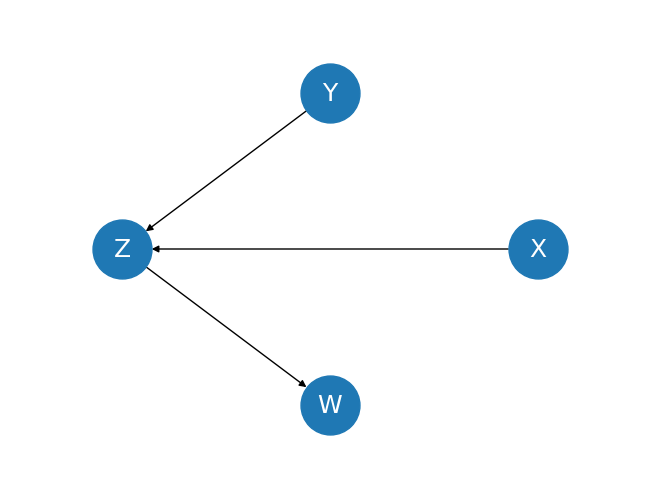

In [7]:
# Compute the circular layout for the graph
pos = nx.circular_layout(learned_graph)
nx.draw(learned_graph, pos, with_labels=True, node_size=1800, font_size=18, font_color='white')
plt.margins(0.2)
plt.show()

### Example 2: Five-factor asset pricing model 
$R_{it} - R_{ft} = a_i + b_i(R_{Mt} - R_{ft}) + s_i SMB_t + h_i HML_t + r_i RMW_t + c_i CMA_t + e_{it}$

The factors include:
- Market risk premium: $b_i (R_{Mt} - R_{ft})$
- Size effect: $s_i SMB_t$
- Book-to-market effect: $h_i HML_t$
- Profitability: $r_i RMW_t$
- Investment patterns: $c_i CMA_t$


### Data

1. Data in Gu, S., Kelly, B., & Xiu, D. (2020)
- Including factors that scholars believe can explain stock returns

2. Returns of individual stocks (t+1)


3. 5000 listed companies in 2015

### Complete graph
![](https://drive.google.com/uc?export=view&id=1VHSP79lQz1uF0fkMODIHjUvnA9k-_2ik) 

### Learned graph
![](https://drive.google.com/uc?export=view&id=1VMkoJMcoGEpJtOZb-TbkDyfofrfoO4gw)

### Comments from Nobel Prize winner Guido W. Imbens

Guido Imbens at Stanford University

- Awarded with the Nobel Memorial Prize in Economic Sciences for methodological contributions to the analysis of causal relationships


- Potential Outcome (PO) framework

Based on Imbens (2020), DAG approach has two fundamental benefits


- Can be a powerful way of illustrating key assumptions in causal models


- Machinery developed in the DAG literature aims to allow researchers to answer particular causal queries in a systematic way


There are five features of the PO framework that may be behind its current popularity in economics

1. There are some assumptions that are easily captured in the PO framework relative to the DAG approach.


2. The potential outcomes in the PO framework connect easily to traditional approaches to economic models such as supply and demand settings where potential outcome functions are the natural primitives


3. Many of the currently popular identification strategies focus on models with relatively few (sets of) variables, where identification questions have been worked out once and for all


4. The PO framework lends itself well to accounting for treatment effect heterogeneity in estimands and incorporating such heterogeneity in estimation and the design of optimal policy functions 


5. The PO approach has traditionally connected well with design, estimation, and inference questions. From the outset Rubin and his coauthors provided much guidance to researchers and policy makers for practical implementation including inference


Comments from Judea Pearl could be found in Pearl (2020):
http://causality.cs.ucla.edu/blog/index.php/2020/01/29/on-imbens-comparison-of-two-approaches-to-empirical-economics/

### Why it is not famous in Economics and Finance?


1. Direction of the causality is assumed in many cases


2. Not interested in system that is too complexed
- Less variables

### References

Chickering, D. M. (2002). Learning equivalence classes of Bayesian-network structures. The Journal of Machine Learning Research, 2, 445-498.

Fama, E. F., & French, K. R. (2015). A five-factor asset pricing model. Journal of financial economics, 116(1), 1-22.

Glymour, C., Zhang, K., & Spirtes, P. (2019). Review of causal discovery methods based on graphical models. Frontiers in genetics, 10, 524.

Gu, S., Kelly, B., & Xiu, D. (2020). Empirical asset pricing via machine learning. The Review of Financial Studies, 33(5), 2223-2273.

Imbens, G. W. (2020). Potential outcome and directed acyclic graph approaches to causality: Relevance for empirical practice in economics. Journal of Economic Literature, 58(4), 1129-1179.

Molak, A. (2023) Causal inference and discovery in python.

Pearl, J., Glymour, M., & Jewell, N. P. (2016). Causal inference in statistics: A primer. John Wiley & Sons.

Pearl, J. (2020). On imbens’s comparison of two approaches to empirical economics. Causal analysis in theory and practice.

Spirtes, P., Glymour, C. N., & Scheines, R. (2000). Causation, prediction, and search. MIT press.